## **Projeto: análise estatística de dados de monitoramento ambiental**


In [ ]:
# importa lib
# importa base de dados
# tratamento
# aed
# hipotese
# conclusao

## **Importando os dados**



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##**Importação de bibliotecas**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
import numpy

## **Leitura dos dados**

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Projeto de Estatística - 2023.2/data_6.csv', header=None)
df = df.rename(columns={0:'exito'})
df

,exito
0,51.35
1,60.13
2,83.93
3,82.93
4,94.41
...,...
995,73.71
996,62.51
997,71.92
998,76.06


In [ ]:
# Definindo as classes
classes = ['CIN', 'Catolica']

# Gerando 1000 valores aleatórios distribuídos entre as classes
probabilidades = [0.7, 0.3]
aleatorio_classes = np.random.choice(classes, size=1000, p=probabilidades)
df['Valores'] = list(aleatorio_classes)
df

,exito,Valores
0,51.35,CIN
1,60.13,Catolica
2,83.93,CIN
3,82.93,CIN
4,94.41,CIN
...,...,...
995,73.71,CIN
996,62.51,Catolica
997,71.92,Catolica
998,76.06,CIN


##**Media**

In [ ]:
MEDIA = df['exito'].mean()
MEDIA

70.34926999999999

##**Mediana**

In [ ]:
MEDIANA =df['exito'].median()
MEDIANA

70.515

##**Moda**

In [ ]:
MODA = df['exito'].value_counts().head()
MODA

67.46    3
68.72    3
71.15    3
75.90    3
79.33    3
Name: exito, dtype: int64

# **Resumo**

In [ ]:
df['exito'].describe()

count    1000.000000
mean       70.349270
std        10.084661
min        38.290000
25%        63.507500
50%        70.515000
75%        77.435000
max       100.000000
Name: exito, dtype: float64

# **Desvio padrão**

In [ ]:
DP = df['exito'].describe().loc["std"]
DP

10.0846612119029

##**Quartis**

In [ ]:
Q1 =df['exito'].describe().loc["25%"]
Q1


63.5075

In [ ]:
Q2 =df['exito'].describe().loc["50%"]
Q2

70.515

In [ ]:
Q3 =df['exito'].describe().loc["75%"]
Q3

77.435

# **Intervalo Interquartil**

In [ ]:
iqr = Q3-Q1
iqr

13.927500000000002

##**Variancia**

In [ ]:
variancia = np.var(df["exito"])
variancia

101.59869136709999

##**Coeficiente de variação**

In [ ]:
CV = (DP/MEDIA)*100
CV

14.335132705574487

# **Curtose**

In [ ]:
Curtose = df['exito'].kurtosis()
Curtose

-0.12097126330864594

##**Teste de Hipótese**
 **hipotese nula h0
hipotese alternativa h1**

In [ ]:
dfcin = df[df["Valores"] == "CIN"]
dfcin

,exito,Valores
0,51.35,CIN
2,83.93,CIN
3,82.93,CIN
4,94.41,CIN
5,68.56,CIN
...,...,...
991,69.99,CIN
993,47.20,CIN
994,71.15,CIN
995,73.71,CIN


In [ ]:
dfcato = df[df["Valores"] == "Catolica"]
dfcato

,exito,Valores
1,60.13,Catolica
8,74.38,Catolica
17,70.96,Catolica
19,78.63,Catolica
22,62.03,Catolica
...,...,...
985,67.76,Catolica
992,66.23,Catolica
996,62.51,Catolica
997,71.92,Catolica


In [ ]:
from scipy import stats


# Realizando o teste de Shapiro-Wilk
stat, p = stats.shapiro(dfcin.exito)

# Verificando o resultado
alpha = 0.05
if p > alpha:
    print(f"Os dados parecem seguir uma distribuição normal (não podemos rejeitar H0): pvalor={p}")
else:
    print(f"Os dados não parecem seguir uma distribuição normal (rejeitamos H0): pvalor={p}")


Os dados parecem seguir uma distribuição normal (não podemos rejeitar H0): pvalor=0.6060424447059631


In [ ]:
# Realizando o teste de Shapiro-Wilk
stat, p = stats.shapiro(dfcato.exito)

# Verificando o resultado
alpha = 0.05
if p > alpha:
    print(f"Os dados parecem seguir uma distribuição normal (não podemos rejeitar H0): pvalor={p}")
else:
    print(f"Os dados não parecem seguir uma distribuição normal (rejeitamos H0): pvalor={p}")

Os dados parecem seguir uma distribuição normal (não podemos rejeitar H0): pvalor=0.4388772249221802


##**Teste Gráfico Q-Q**

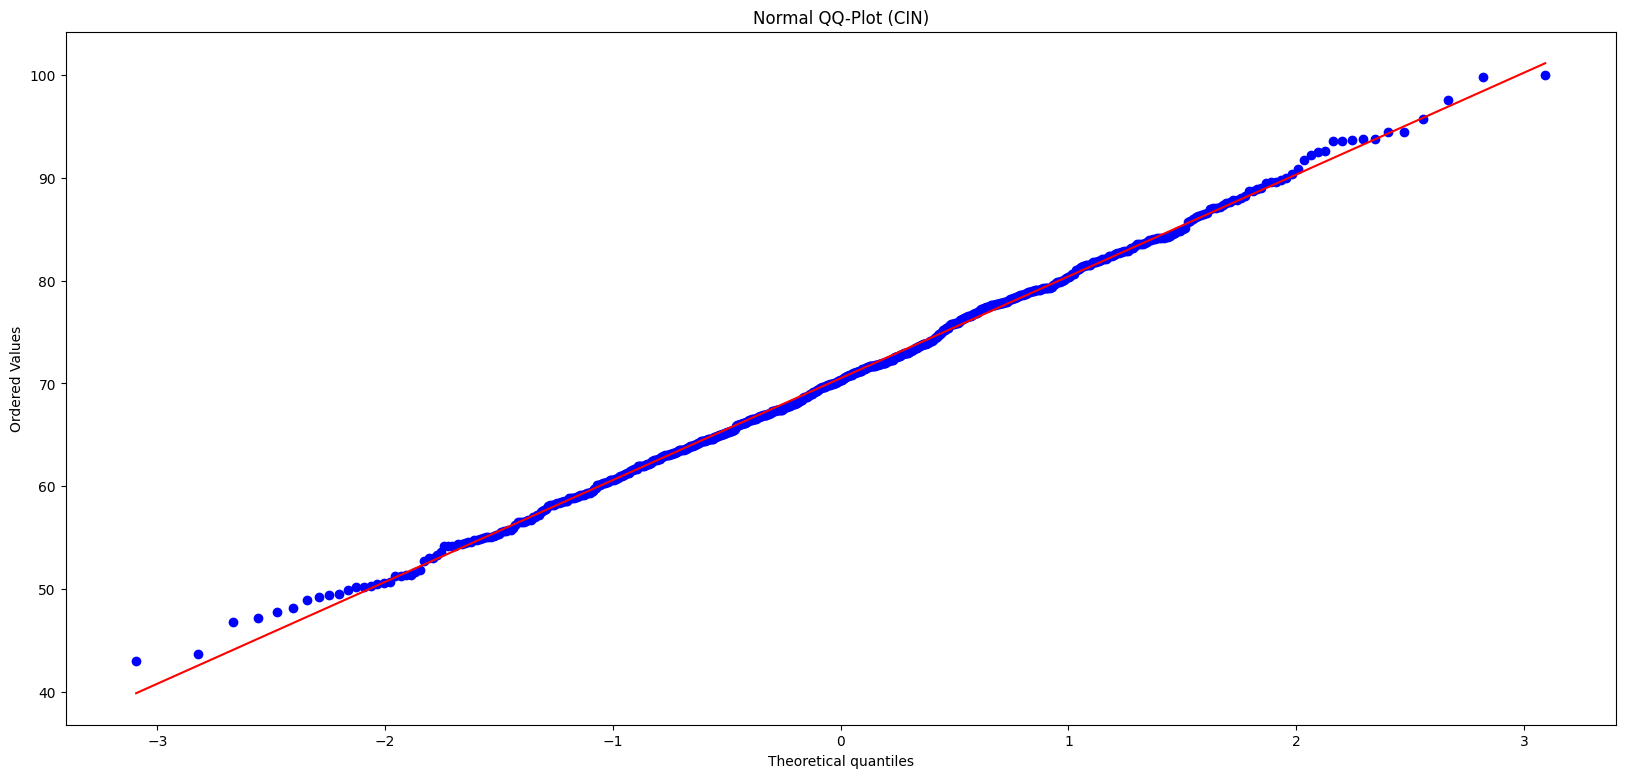

In [ ]:
fig, ax = plt.subplots(figsize = (20, 9))
stats.probplot(dfcin["exito"], dist = 'norm', plot = plt)
plt.title('Normal QQ-Plot (CIN)')
plt.show()

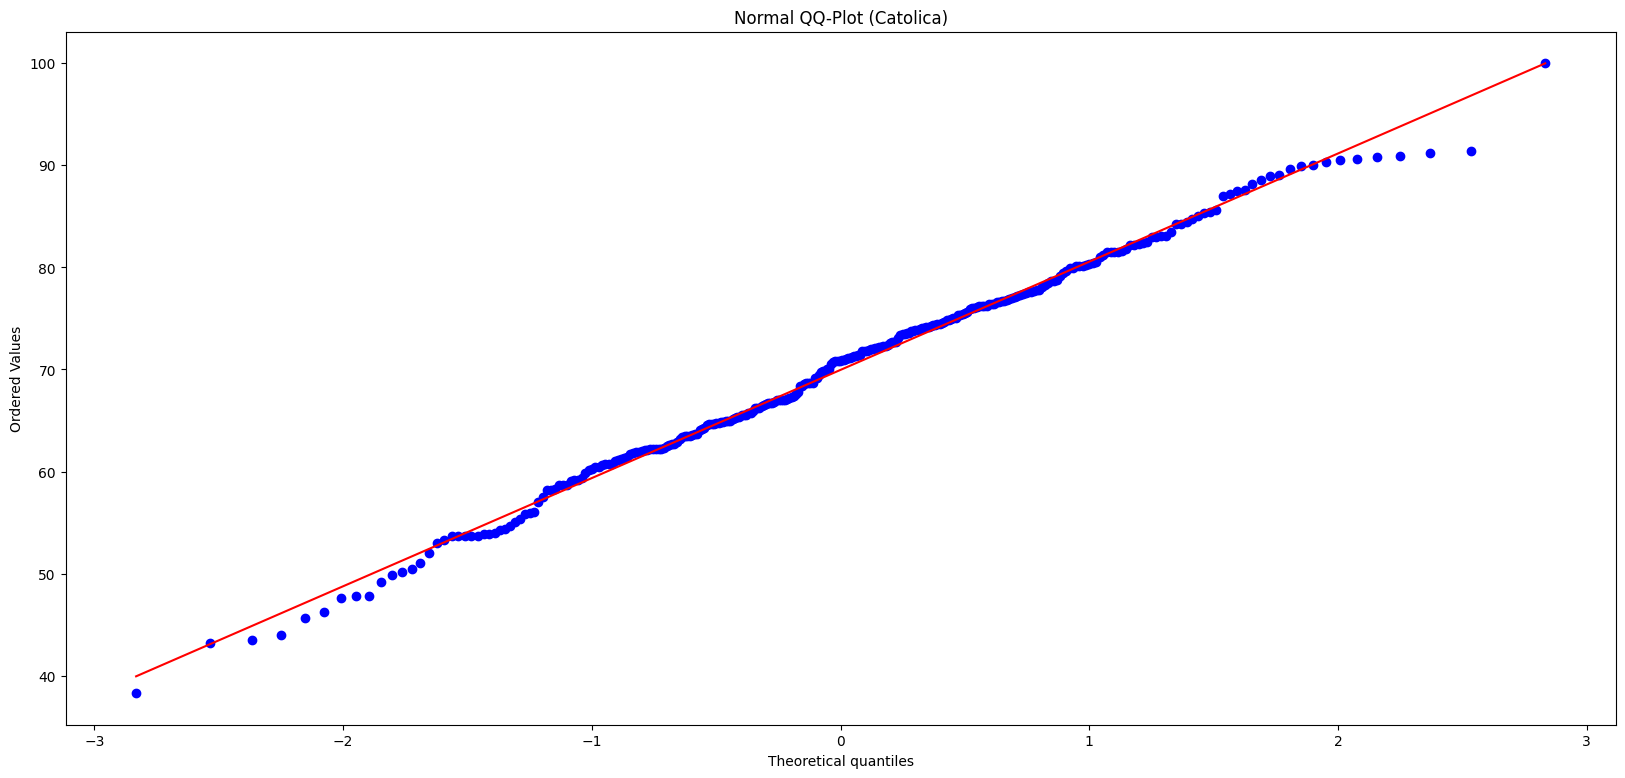

In [ ]:
fig, ax = plt.subplots(figsize = (20, 9))
stats.probplot(dfcato["exito"], dist = 'norm', plot = plt)
plt.title('Normal QQ-Plot (Catolica)')
plt.show()

##**P-valor**

In [ ]:
p

0.4388772249221802

##**Utilizando Teste Z**

In [ ]:
import pandas as pd
from scipy.stats import norm

dados = df['exito']
dfcin = pd.DataFrame(dados)

media_amostras = 500.5
n= len(dfcin)
Z =(MEDIA - media_amostras) / (DP / (n ** 0.5))

alpha = 0.05

valor_critico_superior = norm.ppf(1 - alpha / 2)
valor_critico_inferior = -valor_critico_superior
if Z > valor_critico_superior or Z < valor_critico_inferior:
    print("Rejeitar a hipótese nula. Há evidências suficientes para suportar a hipótese alternativa.")
else:
    print("Não rejeitar a hipótese nula. Não há evidências suficientes para suportar a hipótese alternativa.")

print("Estatística Z:", Z)
print("Valor crítico superior:", valor_critico_superior)
print("Valor crítico inferior:", valor_critico_inferior)

Rejeitar a hipótese nula. Há evidências suficientes para suportar a hipótese alternativa.
Estatística Z: -1348.8366296119236
Valor crítico superior: 1.959963984540054
Valor crítico inferior: -1.959963984540054


##**Gráfico teste de hipotese**

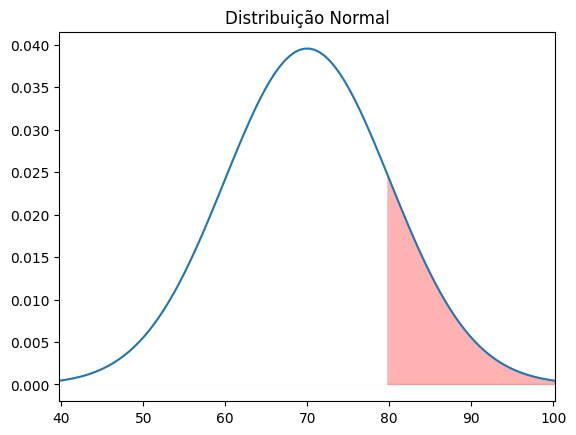

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm


mu = 70
sigma = DP

x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)

y = norm.pdf(x, mu, sigma)

plt.plot(x, y)

plt.xlim(mu - 3*sigma, mu + 3*sigma)

x1 = np.linspace(mu + 3*sigma, -1.645*sigma, 100)
x2 = np.linspace(79.62, 1.645*sigma, 100)
y1 = norm.pdf(x1, mu, sigma)
y2 = norm.pdf(x2, mu, sigma)
plt.fill_between(x1, y1, color='red', alpha=.3)
plt.fill_between(x2, y2, color='white', alpha=1)

plt.title('Distribuição Normal')

plt.show()

##**Gráfico de linhas**

<Axes: >

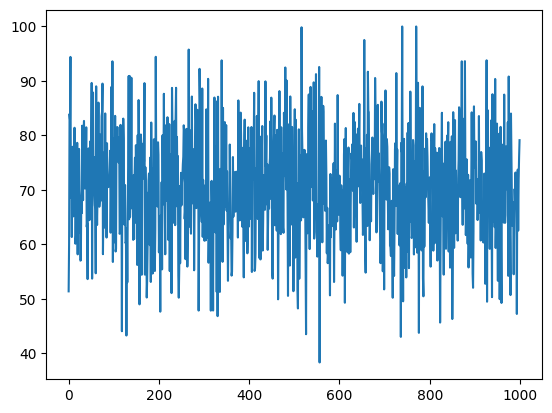

In [ ]:
df['exito'].plot(kind='line')

##**Histograma**

<Axes: ylabel='Frequency'>

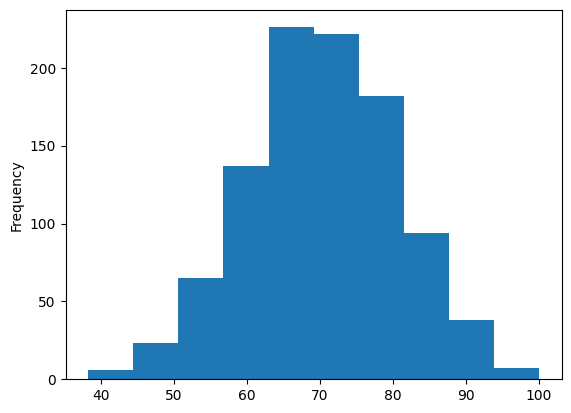

In [ ]:
df['exito'].plot(kind='hist')

##**Boxplot**

<Axes: >

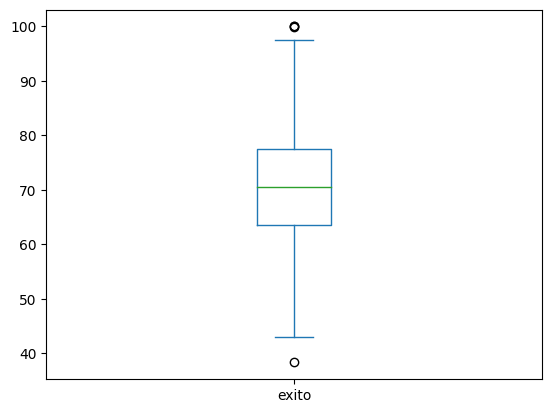

In [ ]:
df['exito'].plot(kind='box')